### Con el conocido DataSet de vino blanco winequality-white.csv (problema de Clasificación) trace las curvas de aprendizaje para la métrica Accuracy para 3 profundidades máximas distintas 2, 7 y 20. Luego explicar los gráficos obtenidos. 

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [152]:
df=pd.read_csv('data/winequality-white.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [153]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(axis=1,columns='quality'),df['quality'],test_size=0.20,random_state=123)

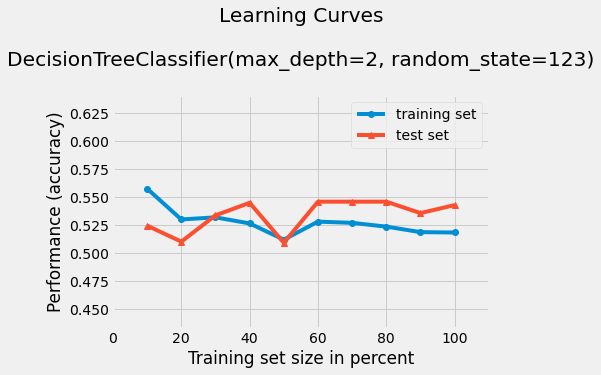

In [154]:
modelo=DecisionTreeClassifier(max_depth=2, random_state=123)

plot_learning_curves(X_train, y_train, X_test, y_test, modelo, scoring='accuracy')
plt.show()

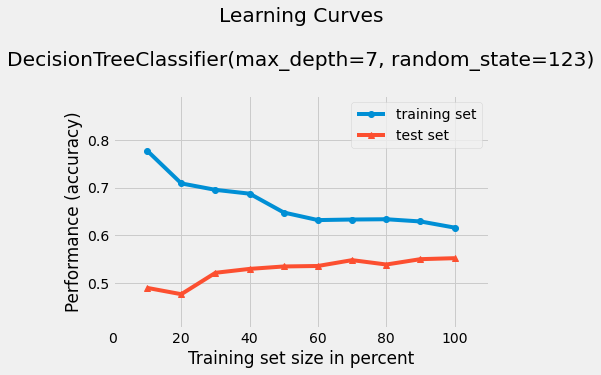

In [155]:
modelo=DecisionTreeClassifier(max_depth=7, random_state=123)

plot_learning_curves(X_train, y_train, X_test, y_test, modelo, scoring='accuracy')
plt.show()

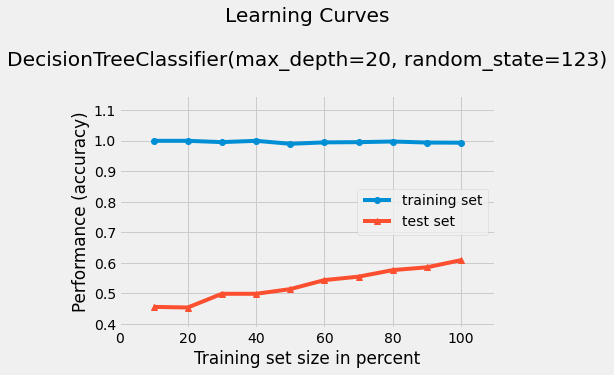

In [156]:
modelo=DecisionTreeClassifier(max_depth=20, random_state=123)

plot_learning_curves(X_train, y_train, X_test, y_test, modelo, scoring='accuracy')
plt.show()

### Conclusiones de las curvas de aprendizaje:

La primera curva, con profundidad maxima 2, nos muestra que el modelo no esta logrando ajustarse a los datos del train por su simpleza. Esto se ve con resultados de evaluacion en el train con performance baja, siendo el accuracy de 50% aprox. Luego al evaluarlo en el test, convergen aproximadamente a los mismos valores. Entonces, estamos en una situacion de high bias y underfitting, por lo que el proximo paso es empezar a complejizar el modelo a ver si se adapta mejor a los datos con los que lo estamos entrenando.

La segunda learning curve, con profundidad maxima 7, vemos como el modelo aumenta un poco el accuracy en el train, lo que es positivo, porque al evaluarlo en el test tambien el accuracy aumenta levemente cuando utilizamos mas datos para entrenar. De todas formas, un valor de predicciones en el test de 60% aprox de aciertos, pareciera ser muy bajo.

La ultima curva, con profundidad 20, da un tipico caso de high variance y overfitting, lo que se nota claramente porque el modelo se adapto perfectamente a los datos del train, seguramente aprendiendo tambien del ruido. Se confirma la teoria cuando evaluamos en el test set y obtenemos valores de accuracy muy por debajo de lo esperado.

Como conclusion, y habiendo realizado el tuning de hiperparametros para el decision tree en este problema, que dio como resultado que el accuracy mas alto en el test se obtenia en la profundidad maxima de 23, y era de 56,9%, concluyo en que el problema no esta en la modelizacion ni el tuning de hiperparametros. Las posibles causas que encuentro tienen que ver con los datos con los que contamos y el problema en si, predecir un target que en el fondo, es subjetivo.
Lineas de investigacion a proponer: agregar features por ejemplo que describan a la persona que etiqueta los datos para entrenar, por ejemplo, si son enologos, registrar de que pais o region son, porque quizas tienen un paladar particular que los hace interpretar un vino de manera mas similar entre ellos, pero distinta a la que lo hacen las personas de otra.